# Set path - Init 

In [1]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 

import b_meson_fit.signal as bmfs  
import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


# I ) Fitting w/o background signal 

In [2]:
#first we need to generate some data ...

N_events=10000

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)


Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 5.150904893875122
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.344277858734131


In [3]:
print(toy_signalSM.events)

tf.Tensor(
[[ 5.9702506  -0.57718444 -0.31751633 -2.5316002 ]
 [ 7.6666965   0.8663926  -0.22839236 -2.200834  ]
 [ 3.4645941  -0.63139486  0.23670602  1.9849908 ]
 ...
 [ 1.1362014   0.87340903 -0.18673134  2.8245828 ]
 [ 7.859966   -0.12039566 -0.7776048  -1.6811352 ]
 [ 2.451057    0.97650075  0.29468846 -2.6583521 ]], shape=(10000, 4), dtype=float32)


In [4]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_array
betas1=[0.5 , 0.55 , 0.6 , 0.75 , 0.8 , 0.85 , 0.9 , 0.95]
opt_params= {'beta_1': betas1[0]}
optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=FX , verbose=True , opt_params=opt_params)

INIT=toy_signalSM.coeff_init 
print(INIT)0
for j in range(1 ,len(betas1)):
    print(j)
    opt_params= {'beta_1': betas1[j]}

    optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=FX , coefini=INIT ,  verbose=False , opt_params=opt_params)

    print(optimizerTF.optimizer.get_config())

    INIT=toy_signalSM.coeff_init 
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'SAME SIGN' , fixed=FX , coefini=INIT, verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-0.6342063, -0.07829778, 10.495879, 0.005627555, -0.0038839218, 0.37271044, -0.34977278, -0.0010122508, 9.229644, 0.20144449, -0.019899964, -1.0321567, 5.6561704, 0.120559394, -9.339803, -0.010842741, 0.003587393, -0.037425745, -0.6946176, 0.008068045, -7.718776, 0.0, 0.0, 0.0, 4.379947, -0.11980875, 13.98615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9390867, 0.0, 0.0, 0.30796432, 0.0, 0.0, 1.8925714, 0.0, 0.0, 0.035738945, 0.0, 0.0]

  Fitted coefficients :  [-6.8859353, -0.25731495, 10.198376, -0.61156887, 0.0982033

KeyboardInterrupt: 

In [34]:
X=[]
for j in tqdm(range(5)):
    optimizeMigrad , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print(coeffff)
X=np.asarray(X)







  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:15<01:03, 15.79s/it]

[-5.3545356, -0.20130114, 7.9341626, -0.47645104, 0.076517, 0.6965829, -1.3960083, 0.16306366, 12.427047, 0.9434283, -0.12965293, -2.515768, 3.764457, 0.29355943, -8.758536, -1.7806736, 0.18942283, 2.4626775, -0.6634105, 0.071784995, -8.739014, 0.0, 0.0, 0.0, 8.998327, -0.24360335, 14.754914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5028259, 0.0, 0.0, 1.2377898, 0.0, 0.0, 1.6134691, 0.0, 0.0, 1.5775548, 0.0, 0.0]







 40%|████      | 2/5 [00:28<00:44, 14.81s/it]

[-5.299025, -0.19871284, 7.8517876, -0.47134683, 0.07569061, 0.6891821, -1.3841128, 0.16177316, 12.294876, 0.9355688, -0.12854518, -2.491395, 3.7223616, 0.2904615, -8.661362, -1.7608202, 0.18730532, 2.4353838, -0.66013753, 0.071566604, -8.638582, 0.0, 0.0, 0.0, 8.8995905, -0.24090175, 14.593784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4863948, 0.0, 0.0, 1.2242243, 0.0, 0.0, 1.5956244, 0.0, 0.0, 1.5603781, 0.0, 0.0]







 60%|██████    | 3/5 [00:44<00:30, 15.08s/it]

[-5.8142505, -0.21758154, 8.615292, -0.51699317, 0.08301358, 0.7559211, -1.5210074, 0.17783536, 13.4877, 1.0204271, -0.14023204, -2.724832, 4.0810957, 0.31869984, -9.497268, -1.9320974, 0.20555265, 2.671937, -0.7228814, 0.07836371, -9.475869, 0.0, 0.0, 0.0, 9.760771, -0.2642583, 16.00435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6301434, 0.0, 0.0, 1.3426181, 0.0, 0.0, 1.7499557, 0.0, 0.0, 1.7112015, 0.0, 0.0]







 80%|████████  | 4/5 [00:56<00:14, 14.16s/it]

[-4.8494954, -0.18280819, 7.1813107, -0.4313987, 0.069277994, 0.63099647, -1.306787, 0.15377016, 11.315735, 0.8455619, -0.11561599, -2.2706666, 3.41051, 0.26642963, -7.938062, -1.6146729, 0.17192134, 2.2320426, -0.6382391, 0.07020724, -7.874646, 0.0, 0.0, 0.0, 8.1572075, -0.22088966, 13.374282, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3623071, 0.0, 0.0, 1.122464, 0.0, 0.0, 1.4612864, 0.0, 0.0, 1.4301431, 0.0, 0.0]







100%|██████████| 5/5 [01:10<00:00, 14.36s/it]

[-3.717249, -0.1399059, 5.50546, -0.33062652, 0.053096823, 0.48356068, -0.9936881, 0.11671848, 8.660727, 0.6540488, -0.08953142, -1.747184, 2.613179, 0.20411101, -6.081914, -1.2363129, 0.13158305, 1.7094405, -0.48234832, 0.05286298, -6.0420613, 0.0, 0.0, 0.0, 6.2500067, -0.16924101, 10.247295, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.043792, 0.0, 0.0, 0.85992575, 0.0, 0.0, 1.119803, 0.0, 0.0, 1.0958254, 0.0, 0.0]


In [35]:

for i in range(len(fix_array)):
    if fix_array[i]==0:
        
        mean=np.mean(X[:,i])
        std=np.std(X[:,i])
        ste=std/np.sqrt(N_events)
        print('\n')
        print(mean)
        print(ste)
        print(mean-ste , mean+ste)





-5.0069113
0.007135794758796692
-5.0140470725297925 -4.9997754830122


-0.18806192
0.00026482941582798956
-0.18832675220444797 -0.18779709337279202


7.4176025
0.010584832429885864
7.407017706632614 7.428187371492386


-0.44536322
0.0006345386803150177
-0.4459977622330189 -0.4447286848723888


0.0715192
0.00010187309235334396
0.07141733039170503 0.07162107657641173


0.65124863
0.0009271448105573654
0.6503214890509844 0.6521757786720991


-1.3203207
0.0017716953158378602
-1.3220924207568168 -1.3185490301251412


0.15463217
0.00020487375557422637
0.15442729227244853 0.154837039783597


11.6372175
0.016397244930267334
11.620820276737213 11.653614766597748


0.879807
0.0012575416266918183
0.8785494537651539 0.8810645370185375


-0.120715514
0.00017438627779483795
-0.1208899001032114 -0.12054112754762172


-2.3499691
0.0033396151661872864
-2.3533087638020516 -2.346629533469677


3.5183206
0.0049996721744537355
3.5133208882808686 3.523320232629776


0.2746523
0.00038964807987213135
0.2742

-4.1781025 -0.15184344 6.8183246
-5.0069113 -0.18806192 7.4176025


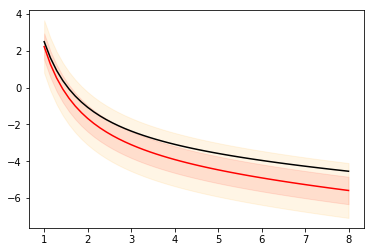

In [36]:
x=np.linspace(1,8)
print( toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2])
print( np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]))


def ansatz(alpha, beta, gamma, q2):
    return alpha + beta*q2 + gamma/q2

def error1(sig_alpha, sig_beta, sig_gamma, q2):
    return np.sqrt(sig_alpha**2 + sig_beta**2*q2**2 + sig_beta**2/(q2**2))


plt.plot(x , ansatz(toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2] , x) , 'k')

plt.fill_between(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x) , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) +error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x) , alpha=0.1 , color='red')
plt.fill_between(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -2*error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x) , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) +2*error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x) , alpha=0.1 , color='orange')

#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) , 'r')
#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) + error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x))


# II ) Testing data generation with background 

In [40]:
from b_meson_fit.optimizer_extended import Optimizer_Extended 
import b_meson_fit.background as background
import tensorflow.compat.v2 as tf 


sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8)
ndat = tf.constant(1000000)
nback = tf.Variable(10000)

coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]

In [39]:
#generate events 

BCK=[back_coeffs[i].numpy() for i in range(len(back_coeffs))]
SIGNAL=[sig_coeffs[i].numpy() for i in range(len(sig_coeffs))]


print('Background coefficients : ', '\n' , BCK , '\n' )
print('Signal coefficients : ' , '\n' ,  SIGNAL , '\n')
events = bmfs.generate_background(BCK,1000,1000000)

events_bck = bmfs.generate_background_mass(BCK)

events_signal= bmfs.generate_signal_mass(SIGNAL)

events = bmfs.generate_all(sig_coeffs, back_coeffs,events_total=100000, alpha = 0.8, poisson = False)

Background coefficients :  
 [55.0, 10.0, 100.0, 80.0, 100.0, 80.0, 100.0, 15.0] 

Signal coefficients :  
 [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] 



TypeError: 'numpy.float32' object is not iterable

In [4]:
x=np.linspace(0 , 10)


In [41]:
#Plot the observables 

plt.rcParams["figure.figsize"] = (20,10)
Labels=['BCK' , 'SIGNAL']
labels=[r'$q^{2}$' , r'cos$\theta_{k}$' , r'cos$\theta_{l}$' , r'$\phi$' , r'$M_{K\pi\mu\mu}$' ]

for j in range(5):
    plt.hist([events_bck[:,j].numpy() , events_signal[:,j].numpy()]  , alpha=0.5 ,  bins=100 ,stacked=True , label=Labels)
    ax = plt.gca()
    ax.set_xlabel(labels[j] , fontsize=20)
    ax.set_ylabel('p' ,fontsize=20)
    
    ax.legend(fontsize=20)
    plt.show()



NameError: name 'events_bck' is not defined

In [6]:
from itertools import islice 
import b_meson_fit.mass as mass
import b_meson_fit.background as bkg


Inputt = iter(coeffs) 
splits = [48,8,1,1,1]
sig_coeffs,back_coeffs,[nbar_dat],[n_back],[alpha] = [list(islice(Inputt, elem)) for elem in splits] #this may break

'''
print(back_coeffs, '\n')

print(nbar_dat, '\n')
print(n_back, '\n')
print(alpha, '\n')
'''

def signal_massTF(mass,mean = 4. ,sig = 1. ):
    #print(mass)
    ans = (tf.exp(-tf.math.square(mass - mean, 2.) / (2 * tf.math.square(sig, 2.))))/(sig*tf.math.sqrt(2*np.pi))
    return tf.reshape(ans , [len(ans),])


events_angles, events_mass = tf.split(events,[4,1],axis = 1)


signal = bmfs.pdf(sig_coeffs,events_angles)
masssss=signal_massTF(events_mass)
XXX=tf.math.multiply(signal , masssss)

#print(XXX)
#print(events_mass)
#print(signal)
print(masssss)

#*mass.signal_mass(events_mass)




tf.Tensor([0.01846055 0.30344918 0.31882244 ... 0.14223836 0.0005379  0.00288719], shape=(99999,), dtype=float32)


In [8]:
# check the exnll function 



def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    nbar_dat=(int(nbar_dat[0]))
    n_back=(int(n_back[0]))
    alpha=alpha[0]

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    n_sig = int(nbar_dat*alpha)
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)
    
    
    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),mass.signal_mass(events_mass))
    backg = tf.math.multiply(bkg.pdf(back_coeffs,events_angles),mass.background_mass(events_mass))

    likelihood = -tf.reduce_sum(
        tf.math.log(
            n_sig*signal
            +n_back*backg
        )
    )
    poisson_counting = (-1*(tf.shape(events)[0].numpy())*tf.math.log(n_sig + n_back))+ n_sig + n_back

    return (likelihood + poisson_counting)
bmfs.exnll(coeffs,events)
exnll(coeffs,events)

[<tf.Variable 'a_para_l_re_alpha:0' shape=() dtype=float32, numpy=-4.1781025>, <tf.Variable 'a_para_l_re_beta:0' shape=() dtype=float32, numpy=-0.15184344>, <tf.Variable 'a_para_l_re_gamma:0' shape=() dtype=float32, numpy=6.8183246>, <tf.Variable 'a_para_l_im_alpha:0' shape=() dtype=float32, numpy=0.008585378>, <tf.Variable 'a_para_l_im_beta:0' shape=() dtype=float32, numpy=-0.0018230017>, <tf.Variable 'a_para_l_im_gamma:0' shape=() dtype=float32, numpy=0.4660742>, <tf.Variable 'a_para_r_re_alpha:0' shape=() dtype=float32, numpy=-0.23538125>, <tf.Variable 'a_para_r_re_beta:0' shape=() dtype=float32, numpy=-0.0043176315>, <tf.Variable 'a_para_r_re_gamma:0' shape=() dtype=float32, numpy=8.003745>, <tf.Variable 'a_para_r_im_alpha:0' shape=() dtype=float32, numpy=0.16564202>, <tf.Variable 'a_para_r_im_beta:0' shape=() dtype=float32, numpy=-0.013095878>, <tf.Variable 'a_para_r_im_gamma:0' shape=() dtype=float32, numpy=-0.30668017>, <tf.Variable 'a_perp_l_re_alpha:0' shape=() dtype=float32, 

TypeError: can't multiply sequence by non-int of type 'list'

In [24]:
coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]


# With background


In [43]:

sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_same, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.Variable(2000, dtype = 'float32')

coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]


events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)

optimizer = opt.Optimizer_Extended(coeffs,events)

for i in range(10000000):
    optimizer.minimize()
    if optimizer.converged():
        print("[optimizer.fit_coeffs.numpy()")
        break
print("not converged")

TypeError: Cannot iterate over a scalar tensor.

# III ) Fitting with background signal 

In [42]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_alphas 

optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'DEFAULT' , fixed=FX , verbose=True )
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'DEFAULT' , fixed=FX , verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

  Fitted coefficients :  [-4.140053, -0.15184344, 6.8183246, -0.08432649, -0.0018230017, 0.4660742, -0.13008726, -0.